# Analysis of Cycling Data

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns
import warnings
import datetime

## Loading Data

The first dataset is an export of the ride data of my respected Professor (Steve). It is acquired from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `scripts/stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so I would need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [5]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again I would create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [6]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns). Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

Firstly, I would combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that I have complete data for every row.  

In [7]:
joined = pd.merge(strava, cheetah, how = 'inner', left_index = True, right_index = True)
joined

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


## Separating the commutes / MTB rides

In [8]:
commutes = joined[ joined['device_watts']== True ]
commutes

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.793750,147.7970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


The 'commutes' dataframe contains only the power measurements recorder from the power meter. All the estimated values are dropped off.

## Distributions of key variables

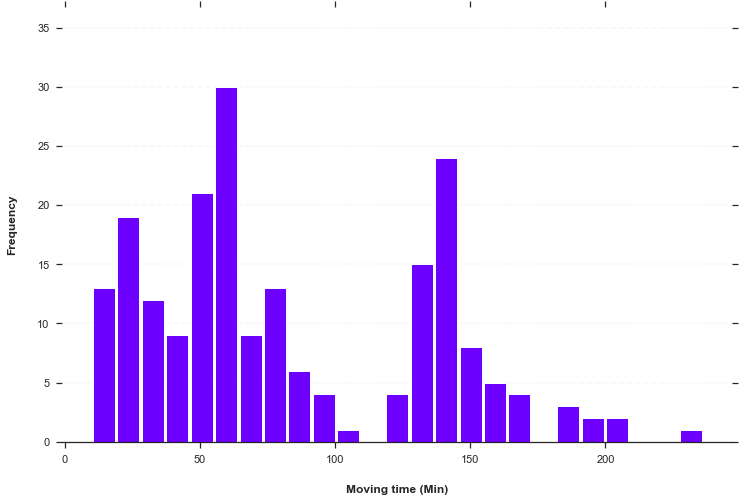

In [36]:
mt = commutes.hist(column='moving_time', bins=25, grid=False, figsize=(12,8), color='#6d00ff', zorder=2, rwidth=0.9)

mt = mt[0]
for x in mt:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Moving time (Min)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)


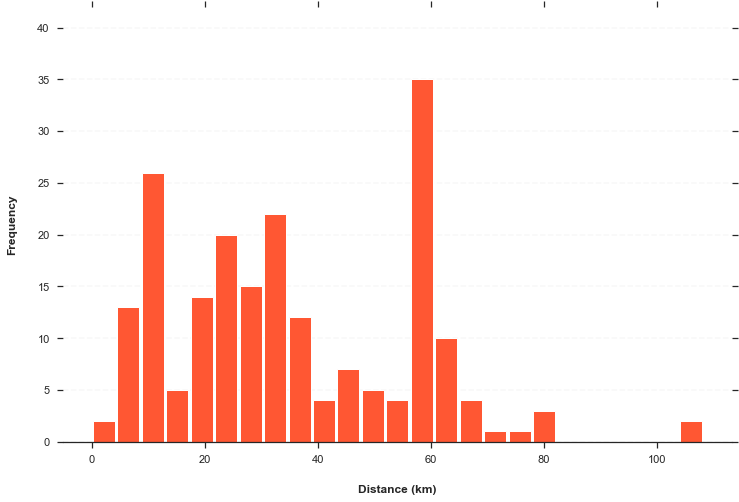

In [37]:
dist = commutes.hist(column='distance', bins=25, grid=False, figsize=(12,8), color='#FF5733', zorder=2, rwidth=0.9)

dist = dist[0]
for x in dist:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Distance (km)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)


In [9]:
average_speed = commutes['distance']/ commutes['elapsed_time']
average_speed

commutes2 = commutes.assign(average_speed = average_speed)
commutes2.head(20)

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS,average_speed
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,222.856,0.83155,20.2257,0.447059
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,245.365,0.91554,94.5787,0.576119
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,253.702,0.94665,98.3269,0.352174
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,232.644,0.86808,171.0780,0.327083
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,212.726,0.79375,147.7970,0.309845
2018-02-10 20:21:37+00:00,103.9,17.0,134.9,True,7.8,19,92.00 m,8,18,Ride,...,0,0,0,0,0,0,192.117,0.71685,15.7590,0.410526
2018-02-10 20:46:02+00:00,152.1,19.0,198.9,True,31.0,49,387.00 m,21,49,Race,...,0,0,0,0,0,0,244.500,0.91231,69.2902,0.632653
2018-02-14 20:07:12+00:00,125.3,19.0,148.9,True,47.8,143,922.00 m,6,132,Ride,...,0,0,0,0,0,0,222.957,0.83193,155.9740,0.334266
2018-02-15 07:18:46+00:00,NaN,22.0,126.1,True,8.9,29,191.00 m,5,25,Ride,...,0,0,0,0,0,0,223.451,0.83377,30.7036,0.306897
2018-02-16 19:19:04+00:00,124.9,20.0,159.6,True,58.6,212,659.00 m,19,132,Ride,...,0,0,0,0,0,0,222.469,0.83011,154.5070,0.276415


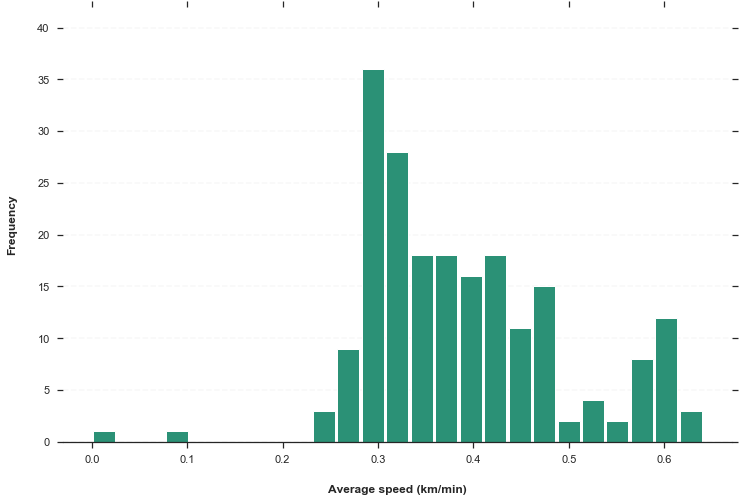

In [38]:

avg_spd= commutes2.hist(column = 'average_speed', bins=25, grid=False, figsize=(12,8), color='#2B9176', zorder=2, rwidth=0.9)

avg_spd = avg_spd[0]
for x in avg_spd:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Average speed (km/min)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)


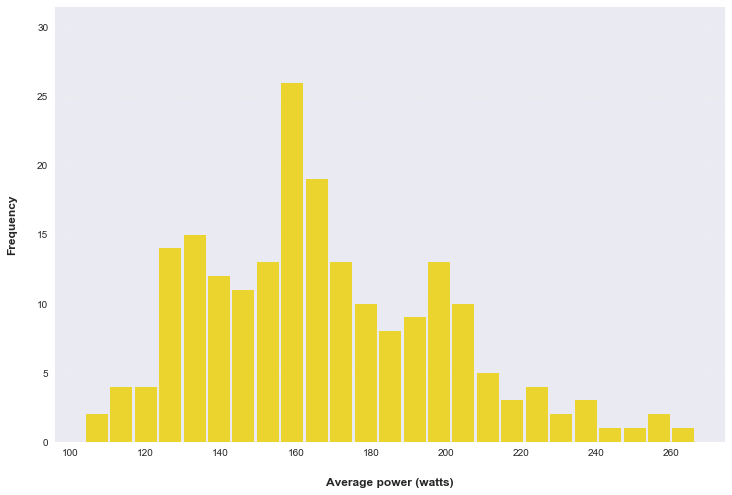

In [10]:

avg_pow= commutes.hist(column = 'average_watts', bins=25, grid=False, figsize=(12,8), color='#EBD42E', zorder=2, rwidth=0.9)

avg_pow = avg_pow[0]
for x in avg_pow:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Average power (watts)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)


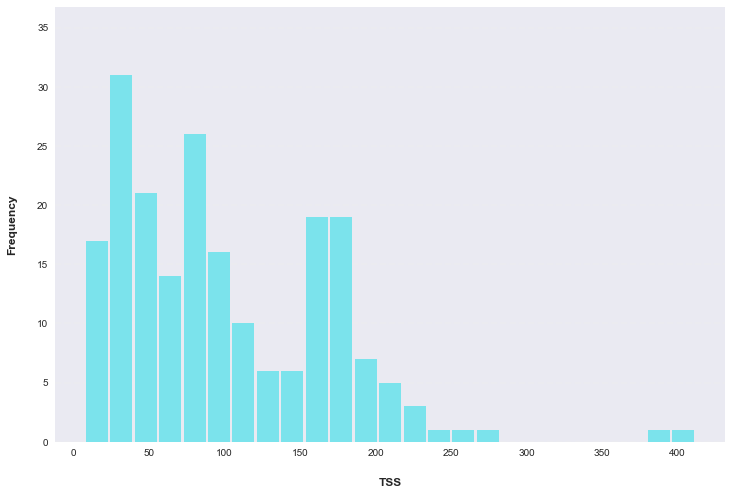

In [11]:
TSS= commutes.hist(column = 'TSS', bins=25, grid=False, figsize=(12,8), color='#7BE3EC', zorder=2, rwidth=0.9)

TSS = TSS[0]
for x in TSS:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("TSS", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)


The distributions of moving time and distance seems to be bimodal. The distribution of average power is normal and average speed and TSS both seem to be skewed positively (right skew).

### Correlation

In [10]:
correlation = commutes2[['distance', 'moving_time', 'average_speed', 'average_heartrate', 'average_watts', 'NP', 'TSS', 'elevation_gain', 'workout_type']]
correlation.head()

,distance,moving_time,average_speed,average_heartrate,average_watts,NP,TSS,elevation_gain,workout_type
2018-01-27 19:39:49+00:00,7.6,17,0.447059,120.6,153.4,222.856,20.2257,95.00 m,Ride
2018-01-27 20:01:32+00:00,38.6,67,0.576119,146.9,187.7,245.365,94.5787,449.00 m,Race
2018-02-05 21:06:42+00:00,24.3,65,0.352174,119.3,165.9,253.702,98.3269,439.00 m,Ride
2018-02-07 06:59:05+00:00,47.1,134,0.327083,124.8,151.0,232.644,171.0780,890.00 m,Ride
2018-02-09 19:18:03+00:00,59.8,139,0.309845,123.0,145.9,212.726,147.7970,656.00 m,Ride


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


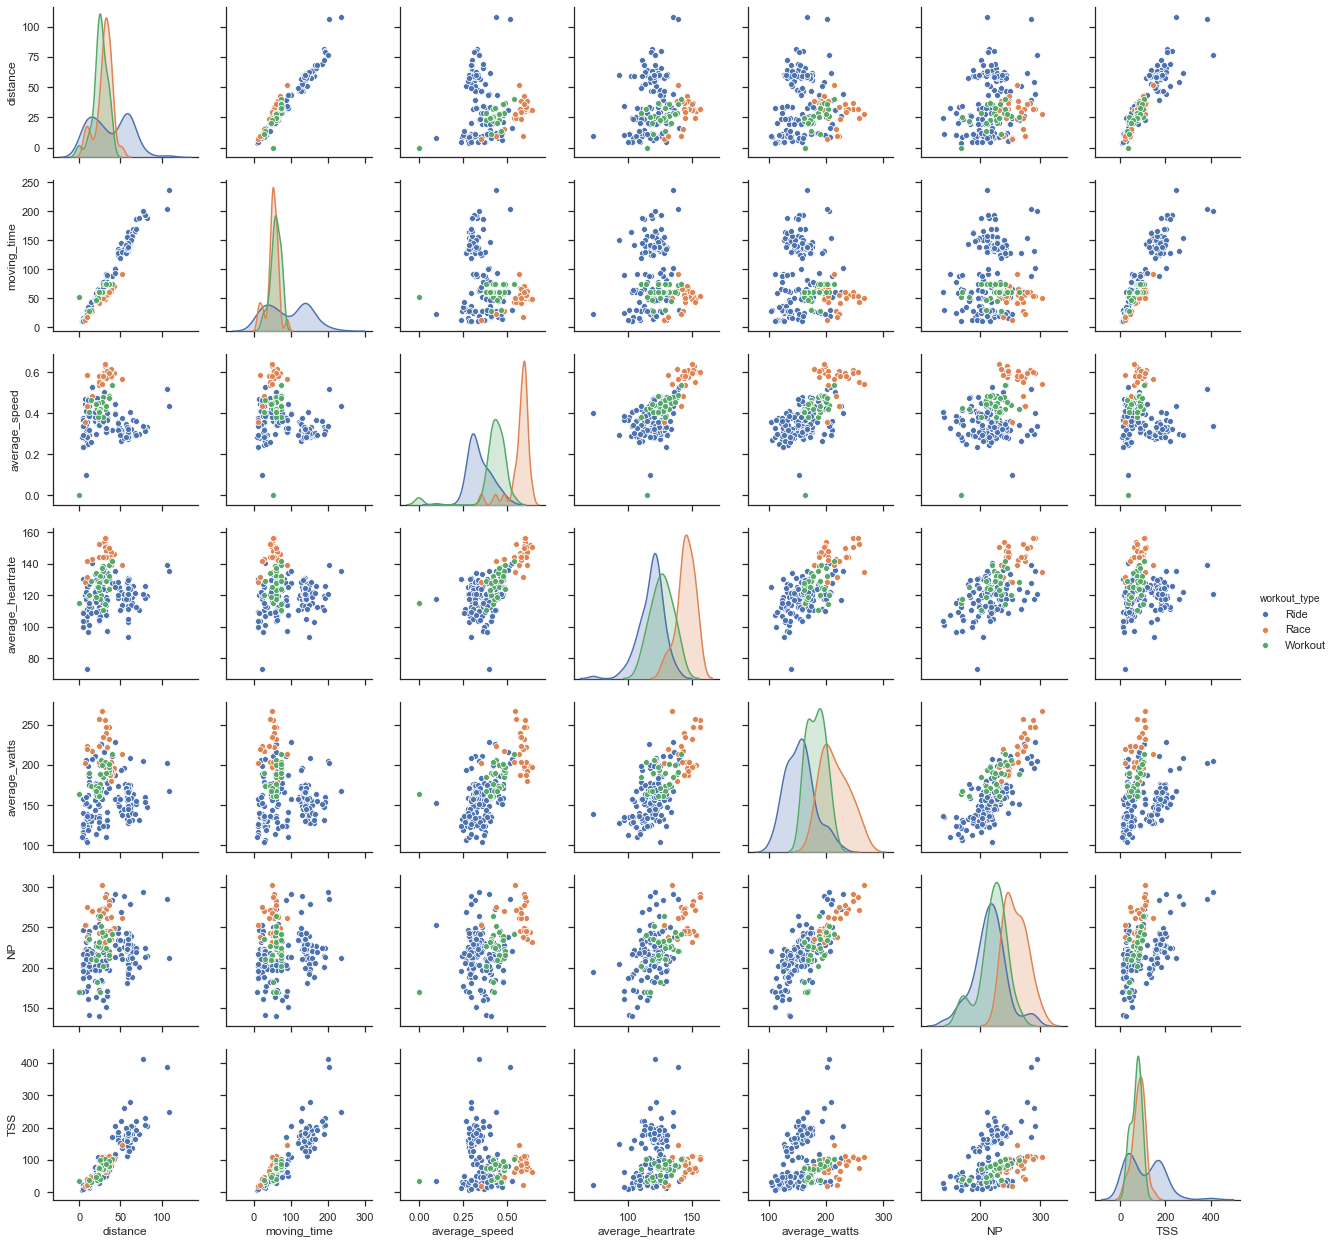

In [11]:
sns.set(style='ticks')
sns.pairplot(correlation, hue='workout_type')
warnings.filterwarnings("ignore")

### Interpretation
Distance is very naturally directly proportional to the moving time, as the longer he moved, the more distance he covered. It can also be seen that the greater the distance travelled in a ride, the higher Training Stress Score (TSS), i.e. the harder the ride, which is also expected. Moving time also maintains a proportinal realtion with TSS, as the longer the ride the harder it should feel. Races usually had lower moving time than that of the other categories of commutes. Average speed maintains a positive correlation with average heartrate and average power as in order to produce greater speed, more power is required and thus causing elevated heartrate. Races in general required more speed and thus generated more power and thus greater heartrate was also captured during races compared to rides and workouts. Normalised power has a proportional realtion with with average heartrate (bound to be, as it's also proportional with average power), however it's not strictly linear. Average power and normailsed power is linearly propotional, which is a given as normalised power is just average power smoothed out.

## Are races more challenging than rides?

In [12]:
races = commutes[commutes.workout_type == 'Race']
rides = commutes[commutes.workout_type == 'Ride']

print("The Normalised Power statistics for Races are: ")
display(races.NP.describe().round(2))

print("The Normalised Power statistics for Rides are: ")
display(rides.NP.describe().round(2))


The Normalised Power statistics for Races are: 


count     29.00
mean     259.66
std       18.50
min      231.61
25%      245.36
50%      261.38
75%      273.06
max      302.40
Name: NP, dtype: float64

The Normalised Power statistics for Rides are: 


count    151.00
mean     216.28
std       27.93
min      139.59
25%      201.94
50%      216.39
75%      231.77
max      294.31
Name: NP, dtype: float64

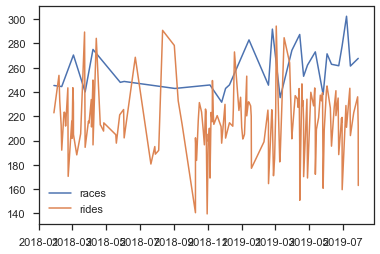

In [35]:
plt.plot(races.NP, label='races')
plt.plot(rides.NP, label='rides')
plt.legend()

It can be seen from the statistics that the average Normalised power required for races are more than that of rides. Thus it can be said that with respect to the power required, races are generally more challenging than rides. This is solidified by the line graphs plotted of normalised power for both races and rides, and it can clearly be seen that races require more power on average than rides do.

## Summarized Data (Monthly)

In [13]:
commutes3 = pd.DataFrame(commutes2.resample('M').distance.sum())

In [14]:
commutes3['TSS'] = pd.DataFrame(commutes2.resample('M').TSS.sum())
commutes3['Monthly Average Speed'] = commutes2.resample('M').average_speed.mean()
commutes3['Year-Month'] = pd.to_datetime(commutes3.index).to_period('M')

In [15]:
commutes3 = commutes3.rename(columns={'distance': 'Distance'})
commutes3

,Distance,TSS,Monthly Average Speed,Year-Month
2018-01-31 00:00:00+00:00,46.2,114.8044,0.511589,2018-01
2018-02-28 00:00:00+00:00,411.9,1247.0274,0.358914,2018-02
2018-03-31 00:00:00+00:00,498.8,1426.2877,0.362168,2018-03
2018-04-30 00:00:00+00:00,368.4,1119.6003,0.333669,2018-04
2018-05-31 00:00:00+00:00,273.3,718.8654,0.349084,2018-05
2018-06-30 00:00:00+00:00,193.4,586.4858,0.409518,2018-06
2018-07-31 00:00:00+00:00,180.7,381.4320,0.296292,2018-07
2018-08-31 00:00:00+00:00,186.7,650.2351,0.351071,2018-08
2018-09-30 00:00:00+00:00,123.2,347.4977,0.417288,2018-09
2018-10-31 00:00:00+00:00,426.6,1055.6187,0.387931,2018-10


The monthly summary shows that Steve had the toughest rides and also travelled the most distance on September 2018 and took it easy on January of that year (according to the TSS). He had the highest monthly average speed of 0.51 km/min on January of 2018 and the lowest on July of that year.